<a href="https://colab.research.google.com/github/raphaelreinauer/Deep_Q_learning/blob/master/Deep_Q_learning_for_Atari_2600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q-learning for Atari 2600
This is my implementation of the Deep Q-learning algorithm described in https://www.nature.com/articles/nature14236
for the implementation of an agent learning to play Atari 2600 games by reinforcement learning.

In [0]:
# importing necessary libaries
import gym
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch as T


In [0]:
'''
Constructing a wrapper for preprocessing the frames generated
by the openai atari environment
We will use openai gym wrappers described in
https://github.com/openai/gym/tree/master/gym/wrappers

Furthermore, I used the blog entry:
https://hub.packtpub.com/openai-gym-environments-wrappers-and-monitors-tutorial/
The hirachy is as follows:
Enc -> Wrapper --> ObservationWrapper (redefine observation-method,
                                    input: observation by the environment,
                                    output: observation passed to the agent)
               \-> ActionWrapper (redefine action-method)
               \-> RewardWrapper (redefine reward-method)
'''

class MaxFrame(gym.Wrapper):
    '''
    Returns the maximum of two consecutive frames
    '''
    #def __init__(self, env):
    #    super(MaxFrame,self).__init__(env)
    #    self.repeat = repeat

    def step(self, action):
        '''
        Overwrite step function
        input: action
        output: max_frame, total_reward, done, info
        '''
        total_reward = 0
        done = False
        # perform 2 steps with action = action
        for i in range(2):
            obs, reward, done, info = super().step(action)
            total_reward += total_reward
            frame_buffer[i,:] = obs
            if done:
                break

        # Compute entrywise maximum of the frames in frame_buffer
        max_frame = np.maximum(frame_buffer[0], frame_buffer[1]).astype(int)
        return max_frame, total_reward, done, info

    def reset(self):
        observation = super(MaxFrame,self).reset(env)
        
        # initialize frame_buffer
        self.frame_buffer = np.zeros((2,*(observation.shape)))
        self.frame_buffer[0] = observation
        return observation

class RescaleGrayscaleFrame(gym.ObservationWrapper):
    '''
    transform frame to grayscale
    reset observation space to new form (rescale_shape)
    (swapping channel axis (gym.spaces.Box))
    rescaling color channel to [0,1]
    '''

    def __init__(self, env, rescale_shape):
        super(RescaleGrayscaleFrame, self).__init__(env)
        self.observation_space.shape = rescale_shape

        # Rescale observation space to [0,1] see:
        # https://www.programcreek.com/python/example/97539/gym.spaces.Box
        self.observation_space = spaces.Box(low=0.,high=1.,shape=self.shape)


    def observation(self, observation):
        '''
        input = old observation
        output = transformed observation
        '''

        # grayscale frame, see:
        # https://www.kite.com/python/answers/how-to-convert-an-image-from-rgb-to-grayscale-in-python
        rgb_weights = [0.2989, 0.5870, 0.1140]

        observation = np.dot(obs_50, rgb_weights)
    
        # resize image from
        # https://medium.com/@manivannan_data/resize-image-using-opencv-python-d2cdbbc480f0
        observation = cv2.resize(observation,(84,84))

        # normalize to [0,1]
        observation /= 255

        return observation

class StackFrames(gym.ObservationWrapper):
    def __init__(self, env, stack_size):
        super(StackFrames,self).__init__(env)
        self.observation_space = spaces.Box(low=0.,high=1.,shape=self.shape)
        # implementing frame_stack as deque
        self.frame_stack = deque()


    def reset(self):

        self.frame_stack.clear()

    def observation(observation):
        '''
        input: observation
        output: stack af
        '''



    # observation function (use deques)
    def make_env(self, env, rescale_shape, stack_size):
        env = MaxFrame(env)
        env = PreprocessFrame(env, rescale_shape)
        env = StackFrames(env, stack_size)
        return env


In [0]:
env = gym.make('PongNoFrameskip-v4')
env = MaxFrame(env)
observation = env.reset()
#plt.imshow(observation)
#plt.show()

for _ in range(50):
    env.step(1)

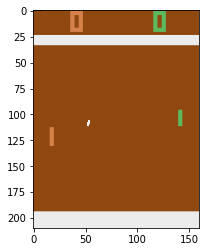

(84, 84)

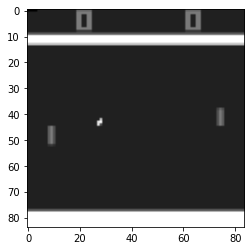

In [168]:
obs_50 = env.step(1)[0]

rgb_weights = [0.2989, 0.5870, 0.1140]

grayscale_image = np.dot(obs_50, rgb_weights)


plt.imshow(obs_50)
plt.show()

plt.imshow(grayscale_image, cmap='gray')

grayscale_image=cv2.resize(grayscale_image,(84,84))
plt.imshow(grayscale_image, cmap='gray')
grayscale_image.shape

In [100]:
deque(np.array[1,2,3],np.array[5,6,7])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [146]:
env.shape

AttributeError: ignored

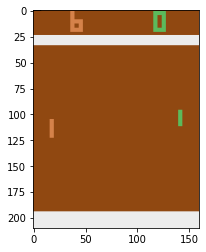

In [126]:
#env.reset()
for _ in range(500):
    env.step(1)[0]
plt.imshow(env.step(1)[0])
plt.show()

2


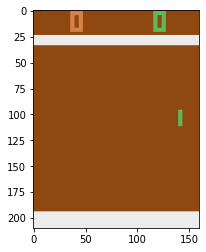

In [66]:
plt.imshow(env.step(1)[0])
plt.show()